In [ ]:
7

Limpieza, análisis, visualización y agrupamiento.
En esta base de datos encontraras:

Aguas subterraneas.
Aguas superficiales.
Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

Limpieza de base de datos.
 Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 
Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math #Esta libreria la usamos lara el ramsey y el Mape
import matplotlib.pyplot as plt
import requests, zipfile #Librerira para zip de nuestros origen de datos
from io import BytesIO

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from google.colab import drive

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer #Esta libreria la usamos al graficar datos
from sklearn.preprocessing import power_transform #esta igual
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Esta tambien la usamoie en el ejercicio 5e
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold


In [ ]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 468 kB/s 
     |████████████████████████████████| 1.0 MB 51.7 MB/s 
     |████████████████████████████████| 1.7 MB 51.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 63.9 MB/s 
     |████████████████████████████████| 6.3 MB 50.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=b4ef0ea3b362fd661a188023017c20f5fb4458ab65e0bba647a736c8d244d3cd
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=eafff7a836180af157de440b85cfff8ad485a3246f160bdf98e8d11fbd58952c
  Stored in directory: /root/.

In [ ]:
import geopandas as gpd
from shapely.geometry import Point


In [ ]:
#Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df_sub=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
#Analiszar los datos para ver como lo vamos a limpiar
df_aguas = df_sub.copy()
df_aguas.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [ ]:
df_aguas.info()
#Un tipo 'O' solo significa “objeto” que en el mundo de Pandas es una secuencia de caracteres (texto)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
df_aguas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [ ]:
df_aguas.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [ ]:
df_aguas.isna().sum().sort_values(ascending=False) #los nulos de forma desdendente


SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [ ]:
#Ya vimos que hay nulos, ahora debemos de ver como la vamos a limpiar
#El priemr detalle es que vemos que on objetos y  flotantes, vamos a ver como lo vamos a limpiar
#Vamos a ver el porcentaje de valores nulos, respecto a la base de datos para ver 

#Qué sigue? #Qué tipo de limpieza, las compañeras quieren amputarlo y rigo quiere conservarlo, hacia donde iremos?
#-------------------------------------

#Y es nuestra salida
#Tenemos diferentes tipos de datos.
#Vamos a ver cuales son las categoricas y cuales numericas

#Aliminamos las categoricas, para que no estorben y despues vamos a borrar 

#columnas_categorias =

columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df_limpio = df_aguas[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

#Ahora que gano la imputacion pues vamos a analizar como se va  a hacer ahorita en un siguiente renglon
df_limpio


,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [ ]:
#Podemos ir checando columna por columna sus valores
print(df_limpio['SDT_mg/L'].unique())
print(df_limpio['SDT_mg/L'].value_counts())


[nan]
Series([], Name: SDT_mg/L, dtype: int64)


In [ ]:
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for i in columnas_numericas:
  print(" nombre de la columna -------------------------" + i)
  #print("Valores unicos", df[i].unique())
  print(" sumatoria por valores uncos--------------------") 
  print(df_limpio[i].value_counts())

'''for i in df.columns:
    print("nombre de la columna", df[i].column)
    print("Valores unicos", df[i].unique())'''

 nombre de la columna -------------------------ALC_mg/L
 sumatoria por valores uncos--------------------
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
 nombre de la columna -------------------------CONDUCT_mS/cm
 sumatoria por valores uncos--------------------
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
 nombre de la columna -------------------------SDT_mg/L
 sumatoria por valores uncos--------------------
Series([], Name: SDT_mg/L, dtype: int64)
 nombre de la columna -------------------------SDT_M_mg/L
 sumatoria por valores uncos--------------------
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length:

'for i in df.columns:\n    print("nombre de la columna", df[i].column)\n    print("Valores unicos", df[i].unique())'

<class 'pandas.core.frame.DataFrame'>


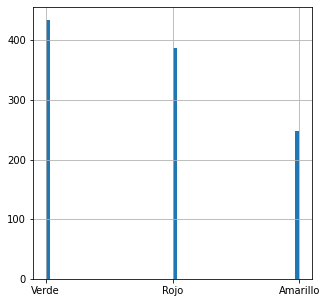

In [ ]:
y= pd.DataFrame(df_aguas['SEMAFORO'])
y
print(type(y))
#PAra plotear necesitariamos tener dataframe comom lista, y = df_aguas['SEMAFORO']
#y.hist(bins = 60, figsize=(5,5))
y['SEMAFORO'].hist(bins = 60, figsize=(5,5))

In [ ]:
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

#Aqui convertimos nuestros datos de tipo objeto hacia flotante, reemplazando los valores a mano

for name in columnas_numericas:
  df_limpio[name] = df_limpio[name].astype('str')
  df_limpio[name] = df_limpio[name].str.replace('<25','25') 
  df_limpio[name] = df_limpio[name].str.replace('<0.2','0.2') 
  df_limpio[name] = df_limpio[name].str.replace('<20','20') 
  df_limpio[name] = df_limpio[name].str.replace('<1.1','1.1')
  df_limpio[name] = df_limpio[name].str.replace('<0.02','0.02') 
  df_limpio[name] = df_limpio[name].str.replace('<0.01','0.01') 
  df_limpio[name] = df_limpio[name].str.replace('<0.003','0.003')
  df_limpio[name] = df_limpio[name].str.replace('<0.005','0.004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0005','0.0004') 
  df_limpio[name] = df_limpio[name].str.replace('<0.0015','0.0015') 
  df_limpio[name] = df_limpio[name].str.replace('<0.025','0.025')  
  df_limpio[name]= df_limpio[name].astype('float')

df_limpio.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A va

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [ ]:
# la columna  SDT_mg/L             0 non-null      float64, esta vacia, asi que nos la vamos a tener que eliminar

df_limpio.drop('SDT_mg/L', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(df_limpio.columns)
print(df_limpio.info())
print(df_limpio.isnull().sum())

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1

In [ ]:
#Ya que nuestro data set esta limpio, ahora si hacemos la simputaciones, o los borramos
#Usaremos una mediana y una chica para imputar, 

#class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)[source]


df_limpio

columnas_numericas_new= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] #sin ,'SDT_mg/L'
'''
for name in columnas_numericas_new:
  mean = df_limpio[name].mean() 
  df_limpio[name]= df_limpio[name].replace(np.nan, mean)'''

#Aqui es la moda, pero mejor la mediana
'''
for name in columnas_numericas_new:
  moda_telas = df_limpio[name].mode() 
  df_limpio[name]= df_limpio[name].replace(np.nan, moda_telas)
'''

for name in columnas_numericas_new:
  mediana = df_limpio[name].median() 
  df_limpio[name]= df_limpio[name].replace(np.nan, mediana)

df_limpio.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
#Ya quedo limpio ahora que sigue?
print(df_limpio.describe())
#Para transposicionarlo usamos el .T
df_limpio.describe().T

          ALC_mg/L  CONDUCT_mS/cm    SDT_M_mg/L  FLUORUROS_mg/L     DUR_mg/L  \
count  1068.000000    1068.000000   1068.000000     1068.000000  1068.000000   
mean    235.558455    1137.133052    895.454185        1.075600   347.842003   
std     116.661485    1242.292889   2748.991295        1.924278   359.514579   
min      26.640000      50.400000     25.000000        0.200000    20.000000   
25%     164.048750     505.500000    337.700000        0.267175   121.274100   
50%     215.527500     815.000000    550.400000        0.503500   245.335800   
75%     292.423750    1321.250000    915.900000        1.139850   453.930000   
max    1650.000000   18577.000000  82170.000000       34.803300  3810.692200   

       COLI_FEC_NMP/100_mL   N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  \
count          1068.000000  1068.000000  1068.000000  1068.000000   
mean            355.490356     4.317663     0.019618     0.003030   
std            2052.457014     8.341504     0.035209     0.000894   
min

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.6400,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.4000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454185,2748.991295,25.0000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.842003,359.514579,20.0000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317663,8.341504,0.0200,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.012476,0.154435,0.0040,0.004000,0.004000,0.004000,5.003200


Identificar medidas de posición no centrales , los cuartiles , outliers.
Identificar correlaciones. Preparar los datos 

In [ ]:
#Bemos la matriz de correlacion
df_limpio.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.217212,0.079572,0.068860,0.243404,-0.016338,-0.000346,0.073458,0.032706,-0.014234,0.069779,0.016989,0.129942,0.043454
CONDUCT_mS/cm,0.217212,1.000000,0.286244,-0.025071,0.692656,0.018021,0.219881,-0.005047,0.029083,0.004436,0.057007,0.024816,0.095940,0.083172
SDT_M_mg/L,0.079572,0.286244,1.000000,-0.013709,0.347211,-0.001102,0.101522,-0.010092,0.010807,-0.000494,0.020332,0.002517,0.018963,0.020103
FLUORUROS_mg/L,0.068860,-0.025071,-0.013709,1.000000,-0.149549,0.003564,-0.019672,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.243404,0.692656,0.347211,-0.149549,1.000000,0.031772,0.301581,-0.106417,0.025010,0.007317,0.064998,-0.017304,0.083868,0.059789
COLI_FEC_NMP/100_mL,-0.016338,0.018021,-0.001102,0.003564,0.031772,1.000000,-0.000926,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,-0.000346,0.219881,0.101522,-0.019672,0.301581,-0.000926,1.000000,-0.007950,-0.009353,-0.015157,0.011367,-0.017317,-0.036810,0.013307
AS_TOT_mg/L,0.073458,-0.005047,-0.010092,0.444079,-0.106417,0.038151,-0.007950,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295
CD_TOT_mg/L,0.032706,0.029083,0.010807,-0.015123,0.025010,-0.001656,-0.009353,-0.009078,1.000000,-0.001824,-0.004631,-0.003080,-0.004205,-0.001036
CR_TOT_mg/L,-0.014234,0.004436,-0.000494,-0.005205,0.007317,-0.008938,-0.015157,-0.009698,-0.001824,1.000000,0.006998,-0.001149,-0.005112,0.000610


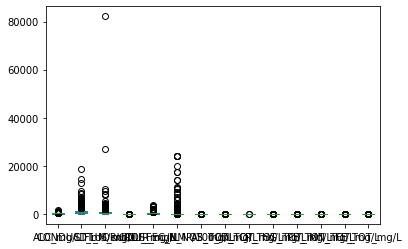

In [ ]:
#HAcemos un diagrmaa de caja para cumplir el requisito de ver los outliers
#Opcion 1, pero necesitamos hacerlo mas grande
df_limpio.plot.box()

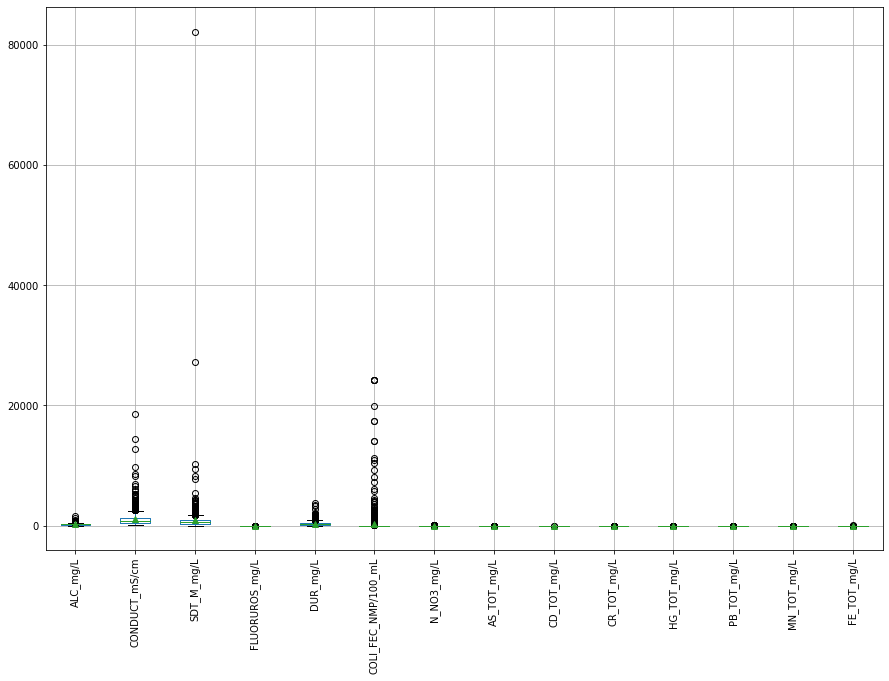

In [ ]:
#Opcion 2
outliers = df_limpio.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

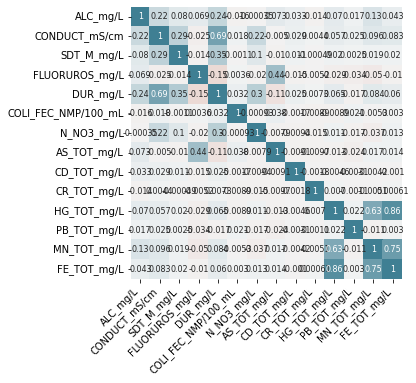

In [ ]:
#Ahora vemos la grafica a color de la correlaciuon

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

mi_correlacion = df_limpio.corr()

sns.heatmap(
    mi_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

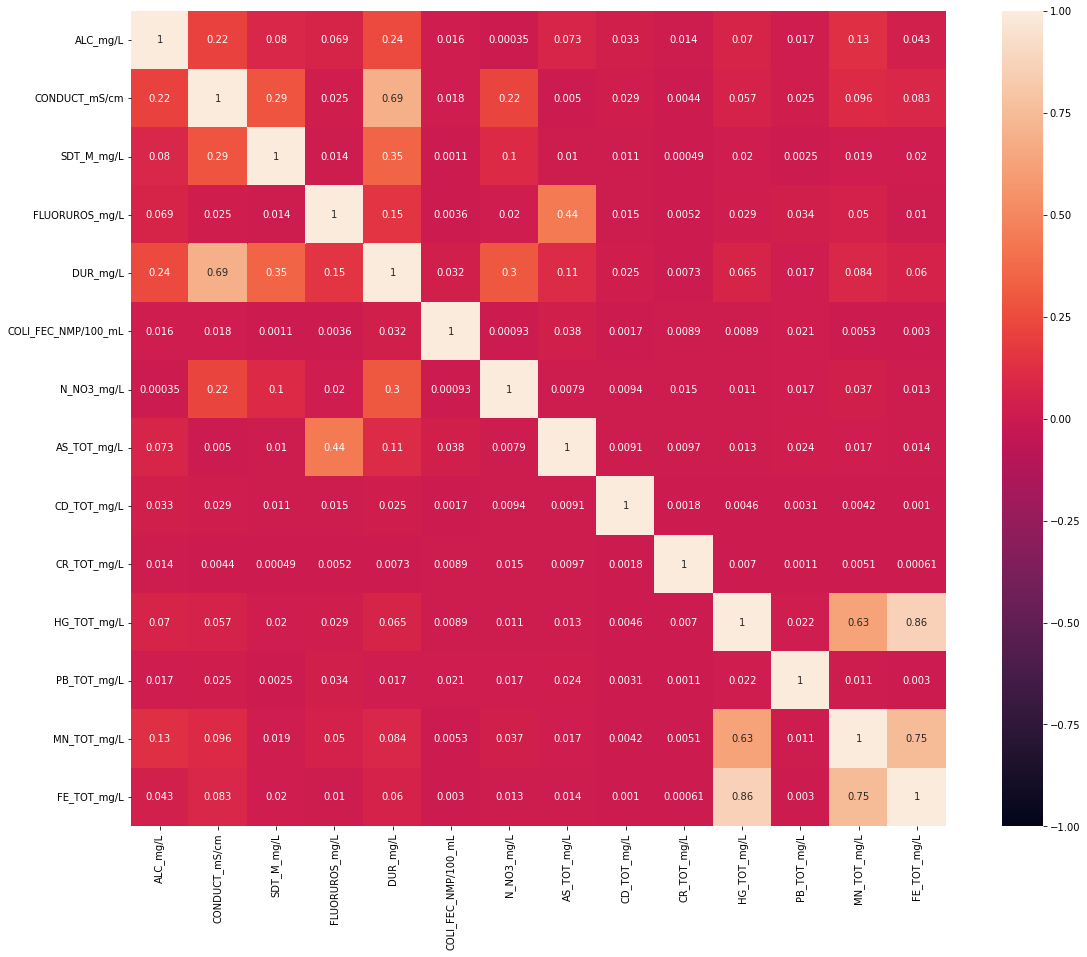

In [ ]:
#Opcion d ecorrelacion 2
correlacion = df_limpio.corr().abs() #El abs es por algo

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.

sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)


Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
#Que variables son la caliudad del agua y cuales la ubicacion geografica
#variables ubicacion geografica
df_ubicacion = df_aguas[['LONGITUD','LATITUD']]
df_ubicacion

#variables calidad del agua semaforo
y

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1068, dtype: object

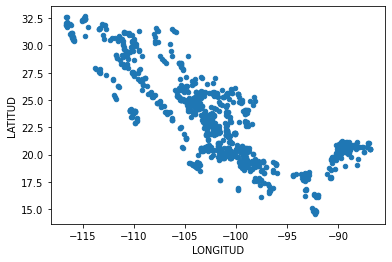

In [ ]:
#Vamos a ver las coordenandas de nuetro data frame en el mapa geopandas

df_ubicacion.plot.scatter('LONGITUD','LATITUD')


In [ ]:
#No tenemos columna de las coordenadas, tenemos que crearla para poder  meterlas al geopandas
df_ubicacion
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


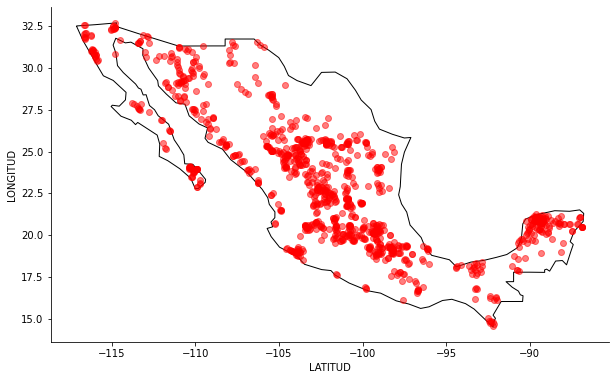

In [ ]:
#deSPUES DE CREAR Y ANADIR LAS COLUMNAS COORDINEDAS TIPO PUNTO, YA PODEMOS USAR EL DEODATAFRAME

puntos_en_mapa = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
puntos_en_mapa

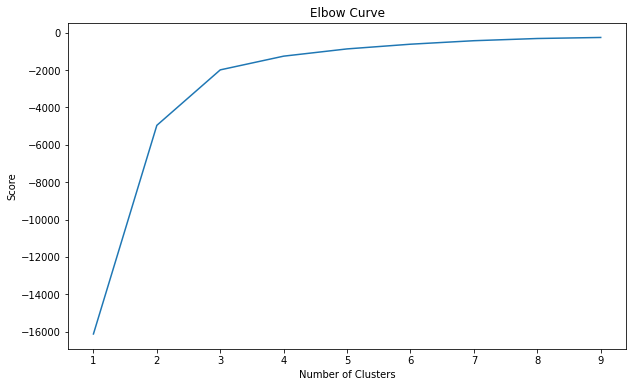

In [ ]:
# Kmeans , vamos a agrupar por color o por ubicacion

from sklearn.cluster import KMeans

#Dia 2. No importa el numero de clusters, asi que haremos le analisis con 3, y si explota, pues regresamos y le aumentamos

#numero_de_closters = range(10,100) #Aqui podemos jugar con el rqango de numero de codos, para ver que no nos de 3 igual que el ejercicio anterio, ese tres como que me saca de onda
numero_de_closters = range(1,10) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

#codito = KneeLocator(X_axis, Y_axis, curve='convex', direction='decreasing')

# Visualize
#plt.subplots(figsize=(50,15))
#plt.figure(figsize=(50,6))
plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
#plt.vlines(codito.knee,linestyles='dashed')
#plt.xticks(range(100))
plt.show()

#kmeans = KMeans(n_clusters = 3, init ='k-means++')
## do clustering
#kmeans.fit(latlong[latlong.columns[0:2]])
# save results
#labels = kmeans.labels_
#labels


In [ ]:
#Los clusters optimos al parecer son 3, pero como es al gusto, ajustamos a 20. Nos vamos con 3
#ploteamos los 3 clusters

X = df_sub[['LONGITUD', 'LATITUD']]

#kmeans = KMeans(n_clusters=20).fit(X) #aqui va si elegimos 20
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,-90.728470,19.473362,POINT (-90.72847 19.47336)
1,-110.794488,28.438202,POINT (-110.79449 28.43820)
2,-101.722127,22.254226,POINT (-101.72213 22.25423)


In [ ]:
#imrpmimos los numeros de elementos por cluster
df_sub['SEMAFORO'].value_counts()


Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [ ]:
#Y ya no va a tner solo una columna, y va a tener 3 columnas, una espanol, una en ingles, y una con un numero que identifique cada color
print(y.head())
print(df_ubicacion.head())

  SEMAFORO codigo_color ingles
0    Verde        Verde  Verde
1    Verde        Verde  Verde
2     Rojo         Rojo   Rojo
3    Verde        Verde  Verde
4     Rojo         Rojo   Rojo
    LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887  POINT (-102.02210 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138  POINT (-110.24480 23.45138)


In [ ]:
y['SEMAPHORE'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

,SEMAFORO,codigo_color,ingles,SEMAPHORE
0,Verde,Verde,Verde,green
1,Verde,Verde,Verde,green
2,Rojo,Rojo,Rojo,red
3,Verde,Verde,Verde,green
4,Rojo,Rojo,Rojo,red
...,...,...,...,...
1063,Rojo,Rojo,Rojo,red
1064,Rojo,Rojo,Rojo,red
1065,Rojo,Rojo,Rojo,red
1066,Verde,Verde,Verde,green


In [ ]:
puntos_en_mapa['LATITUDYLONGITUD'] = puntos_en_mapa['LATITUD'] + puntos_en_mapa['LONGITUD']
diccionario_semaforo = dict(zip(puntos_en_mapa.LATITUDYLONGITUD, y.SEMAPHORE))
diccionario_semaforo

import folium
#Para plotear el mapa
#colors = ['red', 'green', 'blue']
lat = puntos_en_mapa.iloc[0]['LATITUD']
lng = puntos_en_mapa.iloc[0]['LONGITUD']
map = folium.Map(location=[lng, lat], zoom_start=1)
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)
map



In [ ]:
#opcion 2 es hacer un diccionario para cada punto, donde se ponga sus coordenadas y su color

In [ ]:
#Juntar los dataframes de coordenadas y la Y, para imprimrla en un mapa con su color
#y= df_aguas['SEMAFORO']
#DataFrame_Final = pd.concat([df_ubicacion, y], ignore_index=True)
DataFrame_Final['COLOR'] = y['SEMAFORO']
DataFrame_Final.head()

'''
for i in y:
  y.codigo_color[i] = y[i].str.replace('Verde','1') 
  y[i] = y[i].str.replace('Amarillo','2') 
  y[i] = y[i].str.replace('Rojo','3') '''

"\nfor i in y:\n  y.codigo_color[i] = y[i].str.replace('Verde','1') \n  y[i] = y[i].str.replace('Amarillo','2') \n  y[i] = y[i].str.replace('Rojo','3') "

In [ ]:
df_aguas['CALIDAD_COLI_FEC'].value_counts()


Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

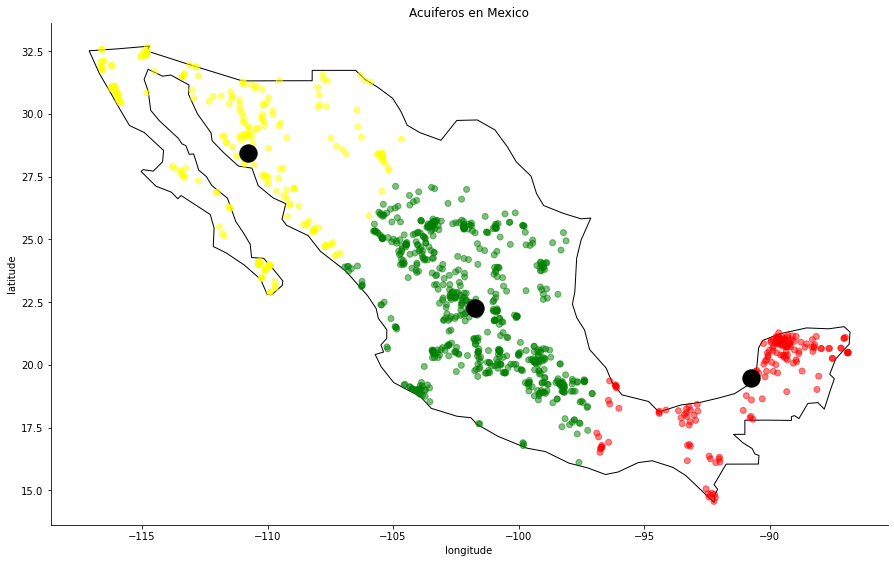

In [ ]:
#Vamos aplotear los centroides

fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

puntos_en_mapa.plot(ax=gax, color=color_asig, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#La propuesta de rigo
#1 Asignar un numero de cluster a cada punto
#2 Sacarle la moda  cada cluster
#3 Graficar cada cluster con su color predominante en la media de los puntos que tiene asignado cada cluster

# Como hacer que el cada cluster imprima el color que le corresponda
# Como agrupar colores
# Sera que se puede psa

from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df_limpio_ASubterraneas["SEMAFORO_Type"]= lbe.fit_transform(df_limpio_ASubterraneas["SEMAFORO"])
df_limpio_ASubterraneas["SEMAFORO_Type"].unique()


In [ ]:
#https://paratodomexico.com/geografia-de-mexico/hidrografia-de-mexico/acuiferos-de-mexico.html


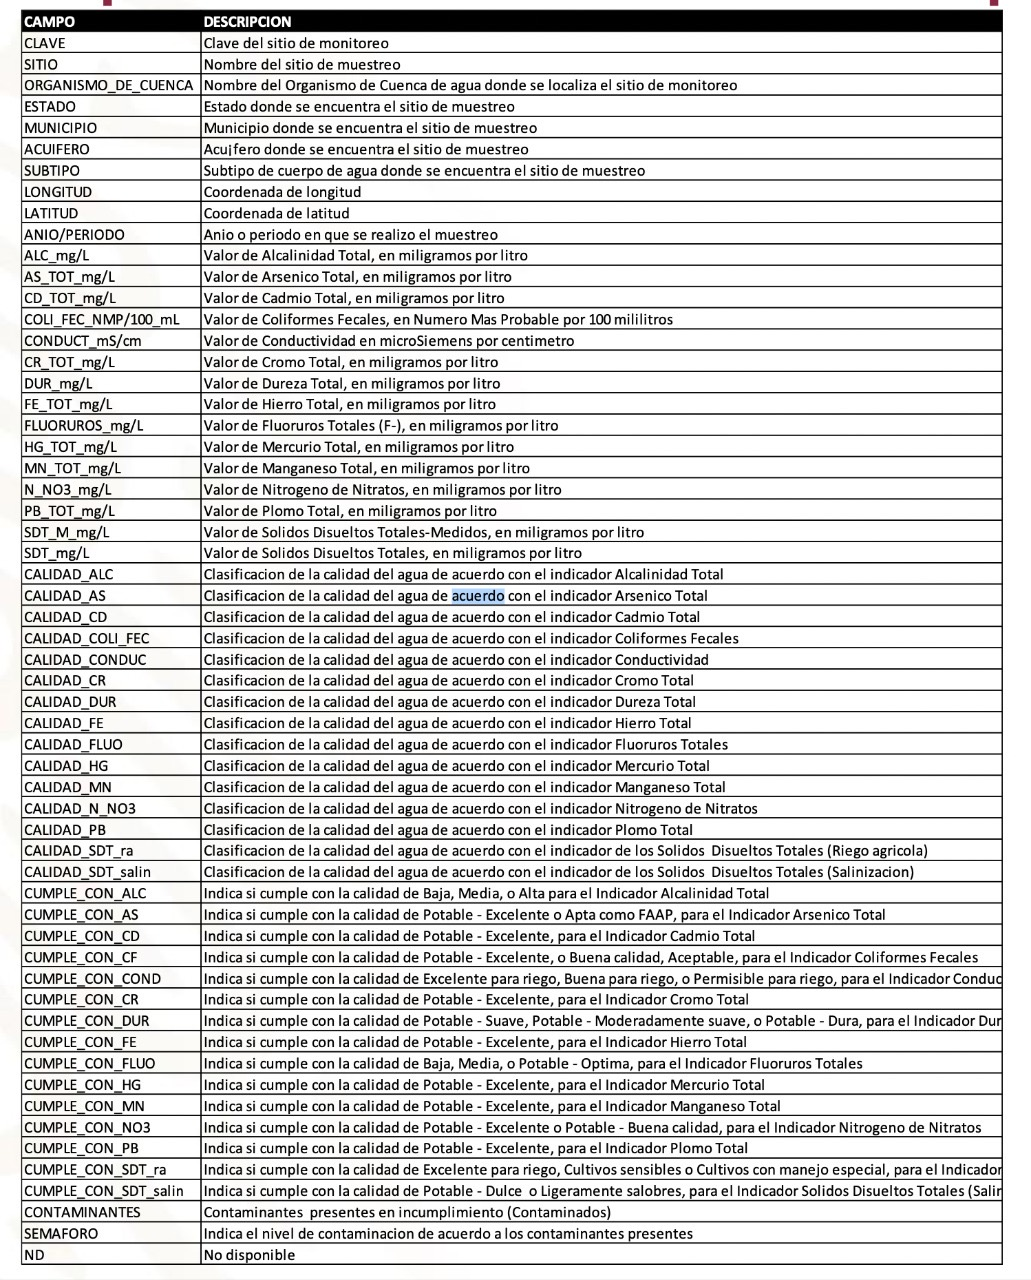